Yanxin Luo

Q1 (a)

In bootstrap, the probability of getting a certain observation is equal each time(with replacement), that is, the probability of sampling any observation is $\frac{1}{n}$. 

Thus, P( first time not picking $j$) = P(not picking $j$) = $1-\frac{1}{n}$.

Q1 (b)

Same as (a).

P( second time not picking $j$) = P(not picking $j$) = $1-\frac{1}{n}$.

Q1 (c)

Since we sampled n times, and each sampling is independent, the probability that the jth observation was not selected in each sampling is $(1-\frac{1}{n})^n$.

Q1 (d)

P( jth observation in the bootstrap sample) = 1- P( jth observation not in the bootstrap sample) = $1-(1-\frac{1}{5})^5 =0.67232 $.

Q1 (e)

P( jth observation in the bootstrap sample)=$1-(1-\frac{1}{100})^{100} \approx 0.633967 $

In [4]:
n = 100
p = 1 - (1 - 1/n)**n
print(p)

0.6339676587267709


Q1 (f)




P( jth observation in the bootstrap sample)=$1-(1-\frac{1}{10000})^{10000} \approx 0.6321389 $

In [5]:
n = 10000
p = 1 - (1 - 1/n)**n
print(p)

0.6321389535670295


Q2

1. Bootstrap Sampling

    Randomly draw $B$ bootstrap samples from the original dataset with replacement. Each bootstrap sample $D_b$ has the same size $n$ as the original dataset but contains repeated observations. (e.g., $B=1000$)
    

2. Model Training 

    For each bootstrap sample $D_b$, train the statistical learning model (e.g., regression, decision tree). Use the trained model to make a prediction $\hat{Y}_b$ for the given predictor value $X$.


3. Estimate the Standard Deviation

    Compute the standard deviation of these predictions: $\hat{\sigma_{Y}}=\sqrt{\frac{1}{B-1}\sum_{b=1}^{B} (\hat{Y}_b - \bar{\hat{Y}})^2}$  where $ \bar{\hat{Y}}$ is the mean of the bootstrap predictions.
    


Q3 (a)

n: the number of observations is 100.

p: the number of features is 2.

Equation: $y=x-2x^2+\epsilon $ where $x \sim \mathcal{N}(0,1), \epsilon \sim \mathcal{N}(0,1)$

Q3 (b)

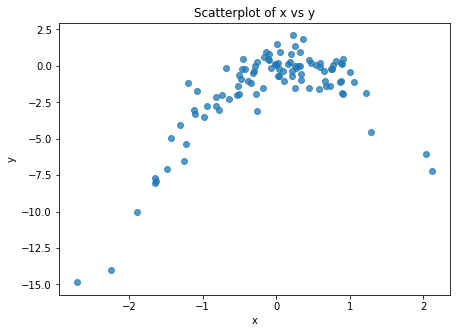

In [6]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1)
x=rng.normal(size=100)
y=x-2*x**2+rng.normal(size=100)

plt.figure(figsize=(7,5))
plt.scatter(x,y,alpha=0.75)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of x vs y")
plt.show()

Q3 (c)

Degree 1: Average MSE = 5.521709904311949
Degree 2: Average MSE = 2.097408500923659e-30
Degree 3: Average MSE = 4.296776219908303e-30
Degree 4: Average MSE = 1.677746662389254e-29


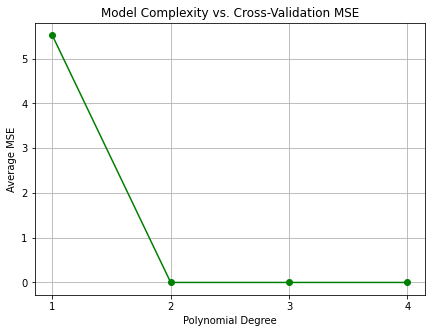

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


rng = np.random.default_rng(1)
x=rng.normal(size=100).reshape(-1, 1)
y=x-2*x**2+rng.normal(size=100)

kf = KFold(n_splits=5,random_state=3,shuffle=True)

degrees = [1,2,3,4]
mse_results={}

for degree in degrees:
    mse_list = []
    
    for train_index, valid_index in kf.split(x):
        x_train, x_valid = x[train_index], x[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        poly = PolynomialFeatures(degree)
        x_train_poly = poly.fit_transform(x_train)
        x_valid_poly = poly.transform(x_valid)
        
        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        
        y_pred = model.predict(x_valid_poly)
        mse = mean_squared_error(y_valid, y_pred)
        mse_list.append(mse)
    
    mse_results[degree] = np.mean(mse_list)

for degree, mse in mse_results.items():
    print(f"Degree {degree}: Average MSE = {mse}")

plt.figure(figsize=(7,5))
plt.plot(degrees, list(mse_results.values()), marker='o', linestyle='-',color="green")
plt.xticks(degrees)
plt.xlabel("Polynomial Degree")
plt.ylabel("Average MSE")
plt.title("Model Complexity vs. Cross-Validation MSE")
plt.grid(True)
plt.show()

The second model has the smallest average error. The degree of its features is the same as the simulation model.

Q4 

False. Given the same dataset, LOOCV always produces the same train-test splits, regardless of a random seed.

Q5 (a)


In [8]:
import pandas as pd
boston=pd.read_csv("./dataset/boston.csv")

E:\ana\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
E:\ana\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [9]:
mu_hat=boston["medv"].mean()
print(f"Mean of medv is {mu_hat}.")

Mean of medv is 22.532806324110677.


Q5 (b)

In [10]:
import numpy as np
sample_std = np.std(boston['medv'],ddof=1) 
n=len(boston["medv"])
se_mu_hat = sample_std/np.sqrt(n)
print(f"Standard error of mu is {se_mu_hat}.")

Standard error of mu is 0.40886114749753505.


Q5 (c)

Bootstrap provides an empirical check for the formula-based SE.

In [11]:
samples=1000
bootstrap_means=[]
for _ in range(samples):
    sample=boston['medv'].sample(frac=1,replace=True) 
    bootstrap_means.append(np.mean(sample))
bootstrap_se = np.std(bootstrap_means, ddof=1)
print(f"Standard error of bootstrap mu is {bootstrap_se}.")

Standard error of bootstrap mu is 0.4183811744924025.


Q5 (d)

In [12]:
lower=mu_hat-2*bootstrap_se
upper=mu_hat+2*bootstrap_se
print(f"CI for mu in bootstrap is [{lower},{upper}].")

lower_2=mu_hat-2*se_mu_hat
upper_2=mu_hat+2*se_mu_hat
print(f"CI for mu in std() is [{lower_2},{upper_2}].")

CI for mu in bootstrap is [21.69604397512587,23.369568673095483].
CI for mu in std() is [21.715084029115605,23.35052861910575].


Q5 (e)

In [13]:
medv_median= np.median(boston["medv"])
print(f"The median value of medv in the population is {medv_median}.")

The median value of medv in the population is 21.2.


Q5 (f)

In [14]:
bootstrap_medians = []
n_bootstrap=1000

for _ in range(n_bootstrap):
    # Sample with replacement
    bootstrap_sample = np.random.choice(boston["medv"], size=len(boston["medv"]), replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))

median_se=np.std(bootstrap_medians)
print(f"the standard error of the median using the bootstrap is {median_se}.")

the standard error of the median using the bootstrap is 0.39771963743320465.


Q5 (g)

In [15]:
medv_10= np.percentile(boston["medv"], 10)
print(f"The tenth percentile of medv in Boston is {medv_10}.")

The tenth percentile of medv in Boston is 12.75.


Q5 (h)

In [16]:
n_bootstrap = 1000
bootstrap_estimates = []

for _ in range(n_bootstrap):
    sample = boston["medv"].sample(frac=1, replace=True)
    bootstrap_estimates.append(np.percentile(sample, 10))

per_se_bootstrap= np.std(bootstrap_estimates)
print(f"The standard error of medv_10 is {per_se_bootstrap} using bootstrap.")

The standard error of medv_10 is 0.4951643666501054 using bootstrap.


Q6 (a)

In [17]:
import pandas as pd
weekly=pd.read_csv("./dataset/weekly.csv")

In [18]:
X=weekly[["Lag1","Lag2"]]
y=weekly["Direction"].map({"Up":1,"Down":0})

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=log_reg.predict(X)
conf_matrix=confusion_matrix(y,y_pred)
accuracy=accuracy_score(y,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 37 447]
 [ 38 567]]
Accuracy: 0.5546372819100092


Q6 (b)

In [21]:
X= weekly.loc[1:, ["Lag1", "Lag2"]]
y = weekly.loc[1:,"Direction"].map({"Up":1,"Down":0})

In [22]:
log_reg2= LogisticRegression()
log_reg2.fit(X,y)

LogisticRegression()

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=log_reg2.predict(X)
conf_matrix=confusion_matrix(y,y_pred)
accuracy=accuracy_score(y,y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 38 445]
 [ 37 568]]
Accuracy: 0.5569852941176471


Q6 (c)

This observation was not correctly classified.

In [24]:
X_test= weekly.loc[[0],["Lag1","Lag2"]]  
y_test= weekly.loc[[0],"Direction"].map({"Up":1,"Down":0})

In [25]:
y_pred = log_reg2.predict(X_test)
print("Predicted Direction for first observation:","Up" if y_pred[0] == 1 else "Down")
print("Actual Direction:","Up" if y_test.values[0] == 1 else "Down")

Predicted Direction for first observation: Up
Actual Direction: Down


Q6 (d)

In [26]:
X=weekly[["Lag1", "Lag2"]]
y=weekly["Direction"].map({"Up":1,"Down":0})
n=len(X)

In [27]:
import numpy as np
errors = np.zeros(n)
for i in range(n):
    X_train=X.drop(index=i)
    y_train=y.drop(index=i)

    X_test=X.iloc[[i]]
    y_test=y.iloc[i]

    model=LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)[0]
    errors[i]=1 if y_pred!=y_test else 0

Q6 (e)

Training with LOOCV failed to reduce the error rate on this dataset.

In [28]:
loocv_error=errors.mean()
print("LOOCV Error Rate:", loocv_error)
print("LOOCV Corrction Rate:",1-loocv_error)

LOOCV Error Rate: 0.44995408631772266
LOOCV Corrction Rate: 0.5500459136822773
